<a href="https://colab.research.google.com/github/ProfessorQu/Generative-Art/blob/main/generative_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt

In [2]:
def init_normal(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight)

def scale(A):
    return (A-np.min(A))/(np.max(A) - np.min(A))

class NeuralNetwork(nn.Module):
  def __init__(self, num_layers, num_neurons):
    super(NeuralNetwork, self).__init__()

    layers = [nn.Linear(2, num_neurons)]

    for _ in range(num_layers - 1):
      layers.append(nn.Linear(num_neurons, num_neurons))
      layers.append(nn.Tanh())
    
    layers.append(nn.Linear(num_neurons, 3))

    self.layers = nn.Sequential(*layers)
  
  def forward(self, input):
    return self.layers(input)

In [3]:
def generate_image(size_x, size_y, num_layers, num_neurons):
  network = NeuralNetwork(num_layers, num_neurons)
  network.apply(init_normal)

  x = np.arange(0, size_x, 1)
  y = np.arange(0, size_y, 1)

  colors = np.zeros((size_x, size_y, 2))

  for i in x:
    for j in y:
      color_y = float(i) / size_y - 0.5
      color_x = float(j) / size_x - 0.5

      colors[i][j] = np.array([color_y, color_x])
  
  colors = colors.reshape(size_x * size_y, 2)
  
  img = network(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
  img = scale(img)

  return img.reshape(size_x, size_y, 3)

def plot_colors(colors, fig_size=4):
  plt.figure(figsize=(fig_size, fig_size))
  plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)

def save_colors(colors):
  plt.imsave(str(np.random.randint(10000000)) + ".png", colors)

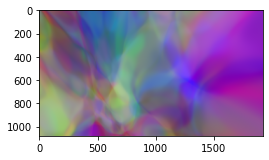

In [4]:
img = generate_image(1080, 1920, 4, 64)
plot_colors(img)
save_colors(img)